# Plot Training Data

Import packages

In [1]:
from packaging import version

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

import scienceplots
mpl.rc_file_defaults()
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams["legend.edgecolor"] = 'black'
plt.rc('legend', fontsize=8)

Load Data from Experiment

In [17]:

df

,run,tag,step,value
147779,"ModelA_V2_1,run_1_0",rollout/ep_len_mean,2048,373.399994
147780,"ModelA_V2_1,run_1_0",rollout/ep_len_mean,4096,380.799988
147781,"ModelA_V2_1,run_1_0",rollout/ep_len_mean,6144,369.500000
147782,"ModelA_V2_1,run_1_0",rollout/ep_len_mean,8192,360.909088
147783,"ModelA_V2_1,run_1_0",rollout/ep_len_mean,10240,356.071442
...,...,...,...,...
238529,"ModelA_V2_1,run_4_0",rollout/ep_rew_mean,5009408,-7086.281250
238530,"ModelA_V2_1,run_4_0",rollout/ep_rew_mean,5011456,-7092.233887
238531,"ModelA_V2_1,run_4_0",rollout/ep_rew_mean,5013504,-7169.193359
238532,"ModelA_V2_1,run_4_0",rollout/ep_rew_mean,5015552,-7241.884766


In [19]:
print("Loading Data from Experiment")

experiment_id = "5En8yf51T0GnsnWx3xlRdA"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
all_data1 = experiment.get_scalars()
all_data1 = all_data1[all_data1["run"].str.contains("(?!.*run_3)(V2)")] # V1_2 A.1
print(f"The following runs will be processed: \n"
      f"{all_data1['run'].unique()}")

experiment_id = "KSR8llhWTROIyp0xS3G7CQ"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
all_data2 = experiment.get_scalars()
all_data2 = all_data2[all_data2["run"].str.contains("run_4")] # V1_2 A.1

print(f"The following runs will be processed: \n"
      f"{all_data2['run'].unique()}")

df = pd.concat([all_data1, all_data2])

print(f"The following runs will be processed: \n"
      f"{df['run'].unique()}")


# Select only the rows where the "tag" column has the values "rollout/ep_len_mean" or "rollout/ep_rew_mean"
df = df[df['tag'].isin(['rollout/ep_len_mean', 'rollout/ep_rew_mean'])]
df = tb.data.experimental.utils.pivot_dataframe(df)

# Rename the columns to "ep_len_mean" and "ep_rew_mean"
df = df.rename(columns={'rollout/ep_len_mean': 'ep_len_mean', 'rollout/ep_rew_mean': 'ep_rew_mean'})

print(f"The following runs will be processed: \n"
      f"{df['run'].unique()}")

Loading Data from Experiment


/var/folders/w7/pwzrv2qn79vf17jf5gw6kv1m0000gn/T/ipykernel_10559/3754844179.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  all_data1 = all_data1[all_data1["run"].str.contains("(?!.*run_3)(V2)")] # V1_2 A.1


The following runs will be processed: 
['ModelA_V2_1,run_1_0' 'ModelA_V2_1,run_2_0']
The following runs will be processed: 
['ModelA_V2_1,run_4_0']
The following runs will be processed: 
['ModelA_V2_1,run_1_0' 'ModelA_V2_1,run_2_0' 'ModelA_V2_1,run_4_0']
The following runs will be processed: 
['ModelA_V2_1,run_1_0' 'ModelA_V2_1,run_2_0' 'ModelA_V2_1,run_4_0']


NEW SINGLE PLOTS

In [ ]:
plt.style.use(['science', 'grid', 'high-vis'])
plt.rcParams['figure.figsize'] = [10, 3]

run1 = all_data[all_data["run"].str.contains("V1_2,run_1")]
run2 = all_data[all_data["run"].str.contains("V1_2,run_2")]
run3 = all_data[all_data["run"].str.contains("V1_2,run_3")]

dfs = [run1, run2, run3]


fig, ax = plt.subplots(1, 1, layout="constrained")

lines = []

for i, df in enumerate(dfs):      
    # Select only the rows where the "tag" column has the values "rollout/ep_len_mean" or "rollout/ep_rew_mean"
    df= df[df['tag'].isin(['rollout/ep_len_mean', 'rollout/ep_rew_mean'])]
    df = tb.data.experimental.utils.pivot_dataframe(df)
    
    # Rename the columns to "ep_len_mean" and "ep_rew_mean"
    df = df.rename(columns={'rollout/ep_len_mean': 'ep_len_mean', 'rollout/ep_rew_mean': 'ep_rew_mean'})
    l = ax.plot(df["step"], df["ep_rew_mean"], label=f"Run {i+1}")

    lines.append(l[0])

for i, df in enumerate(dfs):
    if i != 2:
        # Select only the rows where the "tag" column has the values "rollout/ep_len_mean" or "rollout/ep_rew_mean"
        df= df[df['tag'].isin(['rollout/ep_len_mean', 'rollout/ep_rew_mean'])]
        df = tb.data.experimental.utils.pivot_dataframe(df)

        # Rename the columns to "ep_len_mean" and "ep_rew_mean"
        df = df.rename(columns={'rollout/ep_len_mean': 'ep_len_mean', 'rollout/ep_rew_mean': 'ep_rew_mean'})

        if i == 0:
            last_index = -2
        else:
            last_index = -1

        final_point = df.iloc[last_index][["step", "ep_rew_mean"]]
        ax.plot(final_point[0], final_point[1], 'x', color=lines[i].get_color())

        print(final_point)


plt.yscale('symlog')


# Create the text box
text = "Training failed due to numerical error in Run 1 and Run 2."
bbox = dict(facecolor='white', edgecolor='black', alpha=0.8)
fig.text(0.4, 0.2, text, fontsize=8, bbox=bbox, transform=fig.transFigure)

# Set the title and axis labels
ax.set_title("Training Progression of Model A.1")
ax.set_xlabel("Episode")
ax.set_ylabel("Reward")
ax.legend(fontsize=8, fancybox=False, edgecolor='black')

plt.savefig('images/RL-ModelA_V1_2-Training.png', dpi=300)

plt.show()


In [ ]:

plt.yscale('linear')

Plot all lines seperatley and plot STD

In [ ]:
plt.style.use(['science', 'grid', 'high-vis'])
plt.rcParams['figure.figsize'] = [10, 7]


# Group the data by the "step" column and compute the mean and standard deviation of the "ep_len_mean" column for each group
grouped_df = df.groupby('step')['ep_rew_mean'].agg(['mean', 'std'])

# Reset the index to make "step" a regular column
grouped_df = grouped_df.reset_index()

# Extract the mean and standard deviation values as NumPy arrays
mean_values = grouped_df['mean'].values
std_values = grouped_df['std'].values

fig, ax = plt.subplots(2, 1, layout="constrained")

for i in range(1, 3+1):
    curr_df = df[df["run"].str.contains(str(i))]
    ax[0].plot(curr_df["step"], curr_df["ep_rew_mean"])


# Set the title and axis labels
ax[0].set_title("Variation in Training Due to Randomness")
ax[0].set_xlabel("Timestep")
ax[0].set_ylabel("Reward")

ax[1].plot(grouped_df['step'], std_values)

# Set the title and axis labels
ax[1].set_title("Variation in Standard Deviation of the Reward")
ax[1].set_xlabel("Timestep")
ax[1].set_ylabel("Standard Deviation in Reward")

# plt.savefig('images/randomnessTest.png', dpi=300)

plt.show()
plt.style.use(['science', 'grid', 'high-vis'])

Plot mean w +/- 1 std

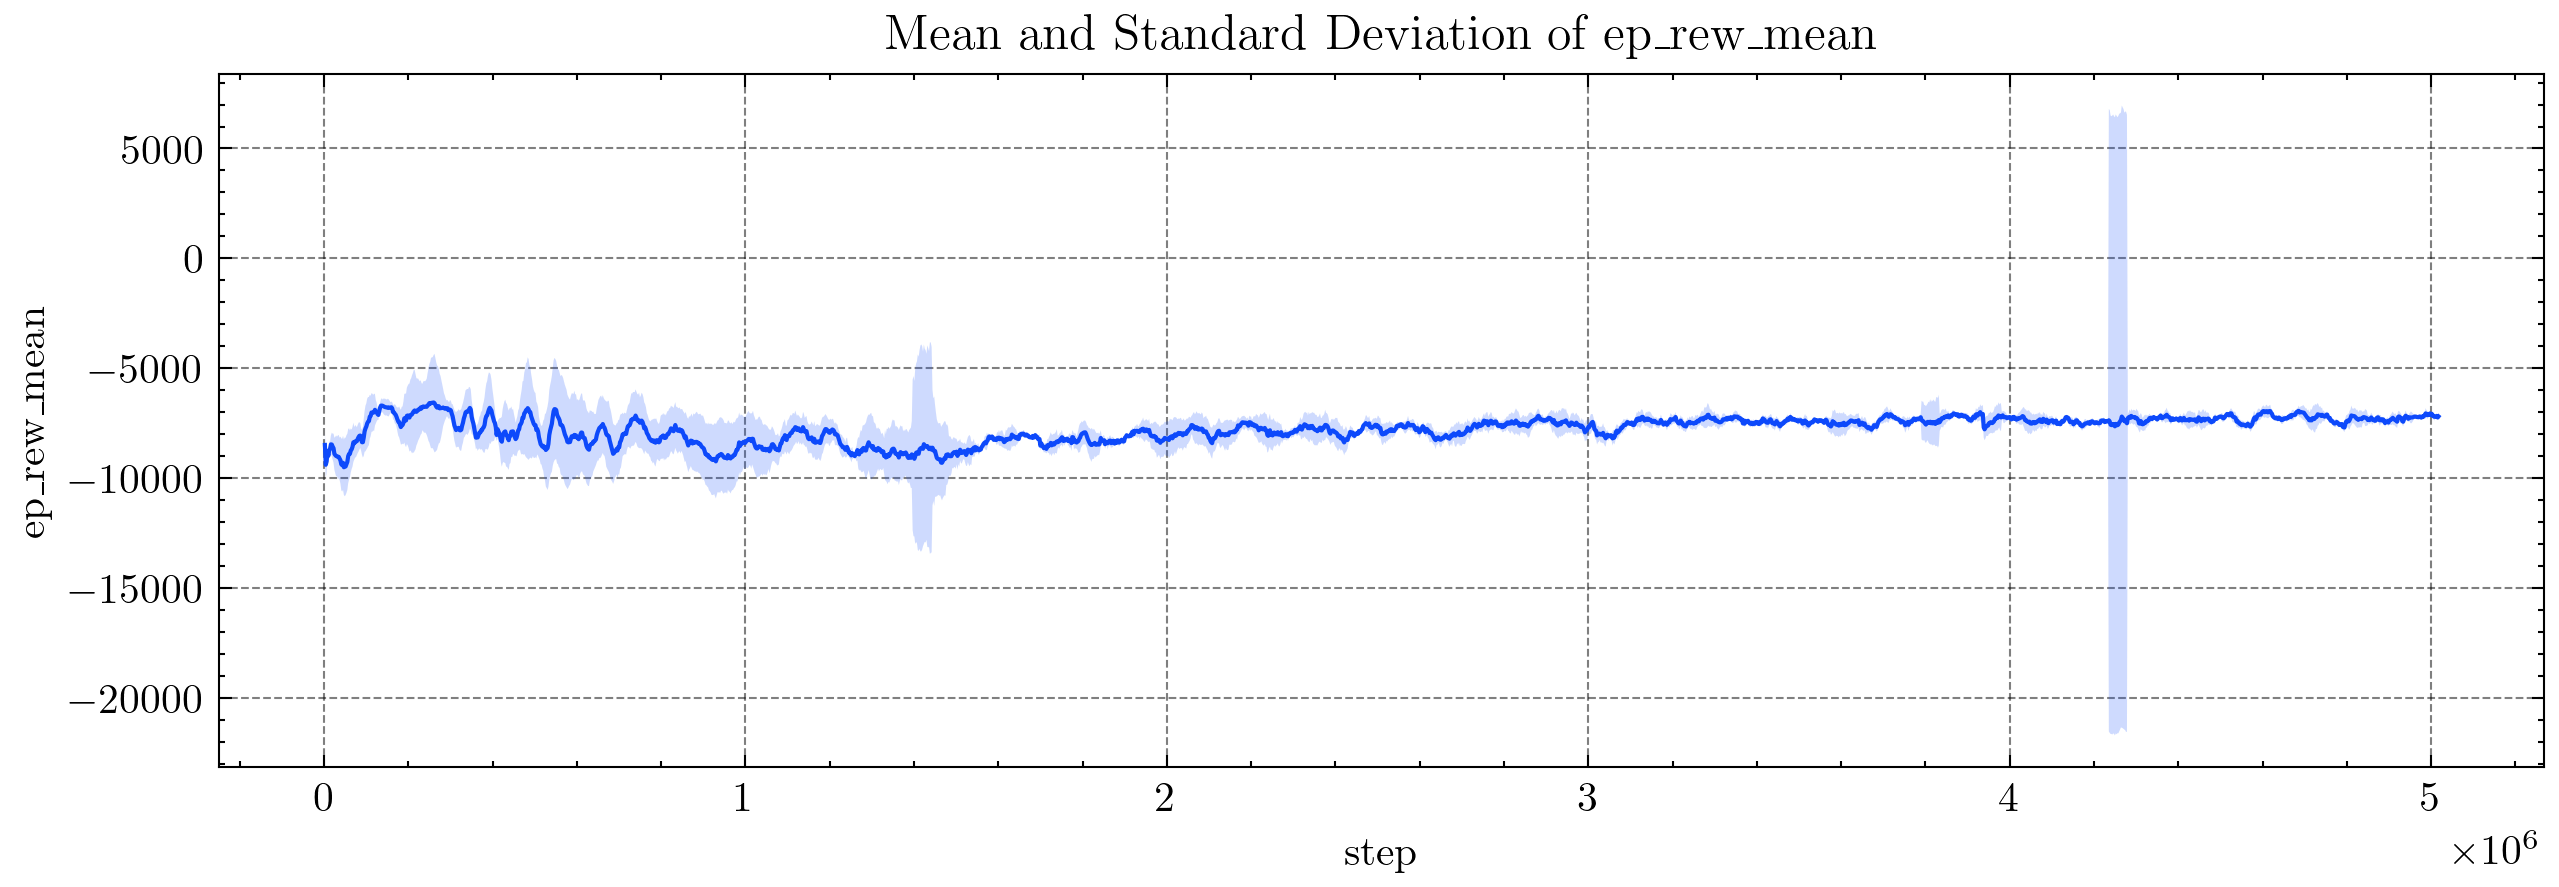

In [21]:
plt.style.use(['science', 'grid', 'high-vis'])

# Group the data by the "step" column and compute the mean and standard deviation of the "ep_len_mean" column for each group
grouped_df = df.groupby('step')['ep_rew_mean'].agg(['median', 'std'])

# Reset the index to make "step" a regular column
grouped_df = grouped_df.reset_index()

# Extract the mean and standard deviation values as NumPy arrays
mean_values = grouped_df['median'].values
std_values = grouped_df['std'].values

# Create a Matplotlib figure and axis object
plt.rcParams['figure.figsize'] = [10, 3]
fig, ax = plt.subplots()

# Plot the mean value of the "ep_len_mean" column
ax.plot(grouped_df['step'], mean_values)

# Shade the region +/- one standard deviation away from the mean
ax.fill_between(grouped_df['step'], mean_values - std_values, mean_values + std_values, alpha=0.2)

# Set the title and axis labels
ax.set_title("Mean and Standard Deviation of ep_rew_mean")
ax.set_xlabel("step")
ax.set_ylabel("ep_rew_mean")

plt.show()

---

Plot Specific Run - 6 Plots

Getting Data
Cleaning Data
Plotting Data


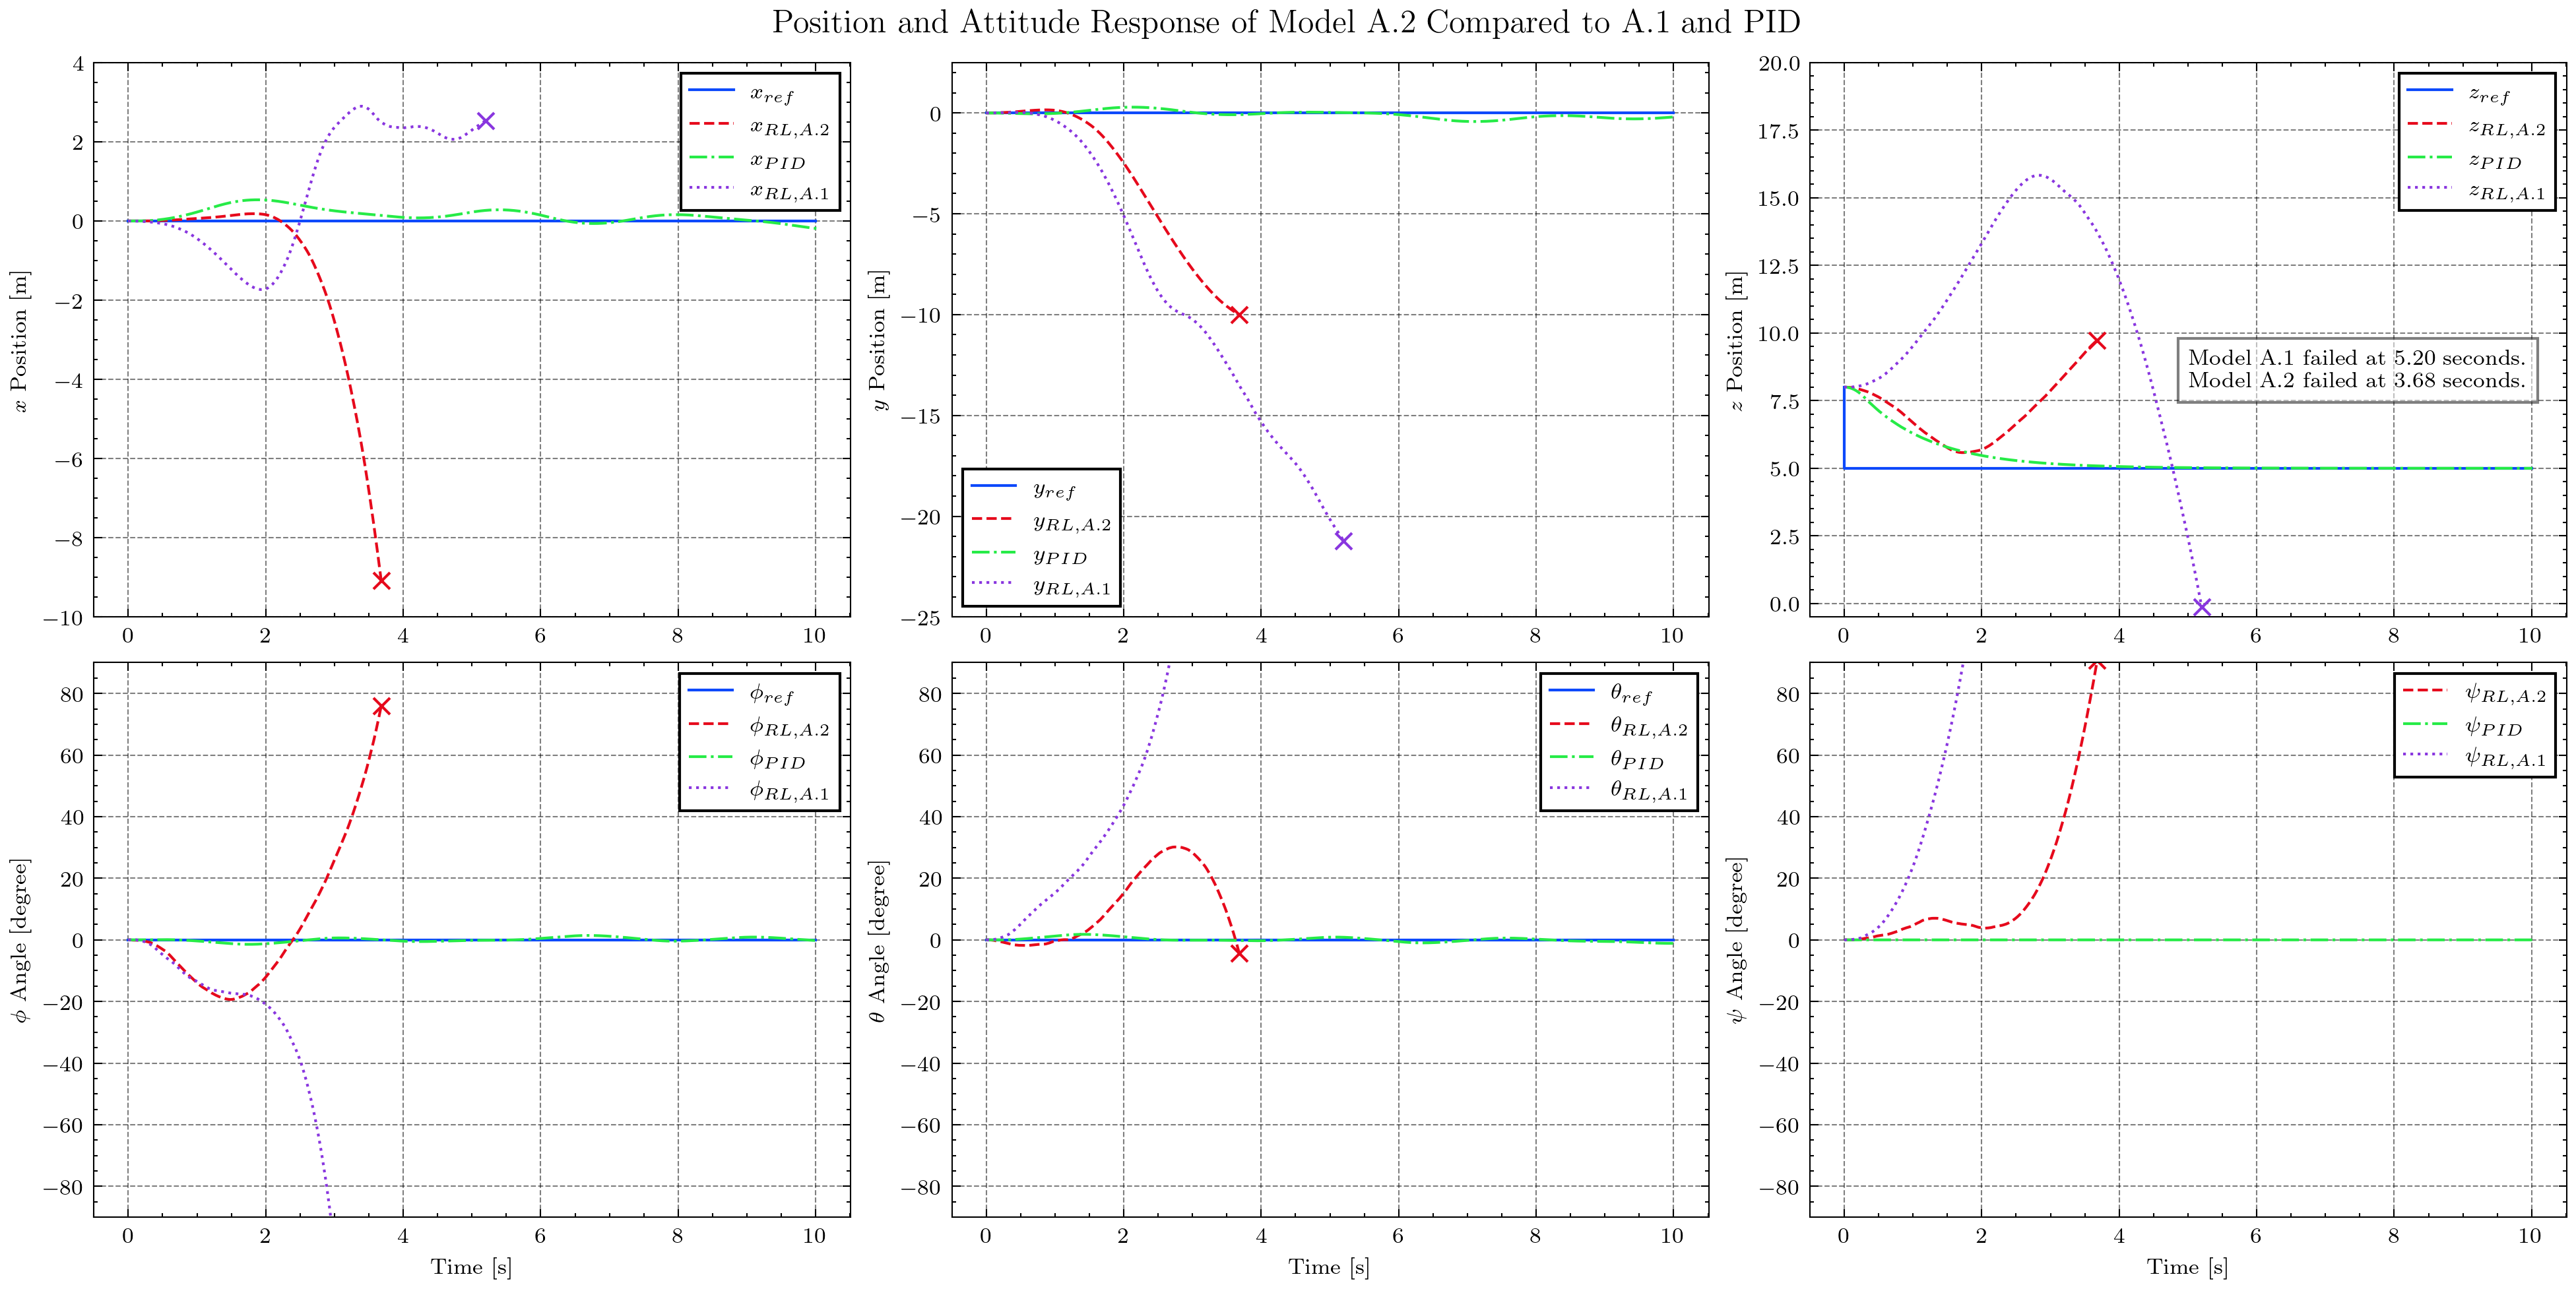

Closing Plots


In [34]:
print("Getting Data")
RL_data = pd.read_csv("data/RL-ModelA_V2_1,run_1-5000000.csv")
RL_data_modelA1 = pd.read_csv("data/RL-ModelA_V1_2,run_1-2200000.csv")
PID_data = pd.read_csv("data/PID-ModelA_V1_2.csv")

# Data cleaning
print("Cleaning Data")

# Multiply z to be positive upwards
RL_data.loc[:, "z"] *= -1
RL_data_modelA1.loc[:, "z"] *= -1
PID_data.loc[:, "z"] *= -1

# Convert angles to degrees
RL_data.loc[:, ["phi", "theta", "psi"]] *= 180 / np.pi
RL_data_modelA1.loc[:, ["phi", "theta", "psi"]] *= 180 / np.pi
PID_data.loc[:, ["phi", "theta", "psi"]] *= 180 / np.pi

symbols = [
    "x",
    "y",
    "z",
    "\phi",
    "\\theta",
    "\psi",
]

ylims = [
    [-10, 4],
    [-25, 2.5],
    [-0.5, 20],
    [-90, 90],
    [-90, 90],
    [-90, 90],
]
ylabels = [
    f"${symbols[0]}$ Position [m]",
    f"${symbols[1]}$ Position [m]",
    f"${symbols[2]}$ Position [m]",
    f"${symbols[3]}$ Angle [degree]",
    f"${symbols[4]}$ Angle [degree]",
    f"${symbols[5]}$ Angle [degree]",
]

reference_signals = [
    [[0, 10], [0, 0]],
    [[0, 10], [0, 0]],
    [[0, 0, 10], [8, 5, 5]],
    [[0, 10], [0, 0]],
    [[0, 10], [0, 0]],
    [],
]

plt.style.use(['science', 'grid', 'high-vis'])

rows = 2
cols = 3

fig, ax = plt.subplots(rows, cols, figsize=(13, 6.5), sharex='row', layout="constrained")

i = 0

print("Plotting Data")
for row in range(rows):
    for col in range(cols):
        if i in [0, 1, 2, 3, 4]:
            ax[row, col].plot(reference_signals[i][0], reference_signals[i][1],
                              label="$" + symbols[i] + "_{ref}$")
        else:
            next(ax[row, col]._get_lines.prop_cycler)


        l1 = ax[row, col].plot(RL_data.iloc[:, 1], RL_data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{RL,A.2}$")
        ax[row, col].plot(PID_data.iloc[:, 1], PID_data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{PID}$")

        l2 = ax[row, col].plot(RL_data_modelA1.iloc[:, 1], RL_data_modelA1.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{RL,A.1}$")


        final_point = RL_data.iloc[-1, [1, i + 2]]
        ax[row, col].plot(final_point[0], final_point[1], 'x', color=l1[0].get_color())

        final_point = RL_data_modelA1.iloc[-1, [1, i + 2]]
        ax[row, col].plot(final_point[0], final_point[1], 'x', color=l2[0].get_color())

        ax[row, col].set_xlabel("Time [s]", fontsize=8) if row == 1 else None
        ax[row, col].set_ylabel(ylabels[i], fontsize=8)
        ax[row, col].set_ylim(ylims[i])
        ax[row, col].tick_params(axis='both', which='major', labelsize=8)
        ax[row, col].legend(fontsize=8, fancybox=False, edgecolor='black')

        i += 1

# Create the text box
text = "Model A.1 failed at 5.20 seconds.\nModel A.2 failed at 3.68 seconds."
bbox = dict(facecolor='white', edgecolor='black', alpha=0.5)
fig.text(0.85, 0.7, text, fontsize=8, bbox=bbox, transform=fig.transFigure)


plt.suptitle("Position and Attitude Response of Model A.2 Compared to A.1 and PID")

plt.savefig('images/RL-ModelA_V2_1,run_1-5000000.png', dpi=300)
plt.show()

print("Closing Plots")
plt.close(fig)


ARCHIVE - Plot Specific run data - 8 plots, inclduing reward

In [ ]:
print("Getting Data")
RL_data = pd.read_csv("data/RL-ModelA_V1_2,run_1-2200000.csv")
PID_data = pd.read_csv("data/PID-ModelA_V1_2.csv")

# Data cleaning
print("Cleaning Data")

# Multiply z to be positive upwards
RL_data.loc[:, "z"] *= -1
PID_data.loc[:, "z"] *= -1

# Convert angles to degrees
RL_data.loc[:, ["phi", "theta", "psi"]] *= 180 / np.pi
PID_data.loc[:, ["phi", "theta", "psi"]] *= 180 / np.pi

symbols = [
    "x",
    "y",
    "z",
    "r",
    "\phi",
    "\\theta",
    "\psi",
    "R"
]

ylims = [
    [-10, 10],
    [-10, 10],
    [-0.5, 10],
    [-2000, 0],
    [-90, 90],
    [-90, 90],
    [-90, 90],
    [-2000, 0],
]
ylabels = [
    f"${symbols[0]}$ Position [m]",
    f"${symbols[1]}$ Position [m]",
    f"${symbols[2]}$ Position [m]",
    f"${symbols[3]}$ Current Reward",
    f"${symbols[4]}$ Angle [degree]",
    f"${symbols[5]}$ Angle [degree]",
    f"${symbols[6]}$ Angle [degree]",
    f"${symbols[7]}$ Total Reward",
]

reference_signals = [
    [[0, 50], [0, 0]],
    [[0, 50], [0, 0]],
    [[0, 0, 50], [8, 5, 5]],
    [],
    [[0, 50], [0, 0]],
    [[0, 50], [0, 0]],
    [],
    [],
]

plt.style.use(['science', 'grid', 'high-vis'])

rows = 2
cols = 4

figure, ax = plt.subplots(rows, cols, figsize=(13, 6.5), sharex='row', layout="constrained")

i = 0

print("Plotting Data")
for row in range(rows):
    for col in range(cols):
        if i in [0, 1, 2, 4, 5]:
            ax[row, col].plot(reference_signals[i][0], reference_signals[i][1],
                              label="$" + symbols[i] + "_{ref}$")
        else:
            next(ax[row, col]._get_lines.prop_cycler)


        ax[row, col].plot(RL_data.iloc[:, 1], RL_data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{RL}$")
        ax[row, col].plot(PID_data.iloc[:, 1], PID_data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{PID}$")

        final_point = PID_data.iloc[-1, [1, i + 2]]
        ax[row, col].plot(final_point[0], final_point[1], 'x')

        ax[row, col].set_xlabel("Time [s]", fontsize=8) if row == 1 else None
        ax[row, col].set_ylabel(ylabels[i], fontsize=8)
        ax[row, col].set_ylim(ylims[i])
        ax[row, col].tick_params(axis='both', which='major', labelsize=8)
        ax[row, col].legend(fontsize=8, fancybox=False, edgecolor='black')

        i += 1

# plt.suptitle("Position and Attitude Response of Model $A$ with $m_1 = 0.75$ and $m_2 = m_3 = m_4 = 1$")

plt.savefig('images/test.png', dpi=300)
plt.show()

print("Closing Plots")
plt.close(figure)
